<a href="https://colab.research.google.com/github/sivasamy1/data_analytics/blob/main/FBI_Crime_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **PART I**

In [ ]:
import pandas as pd
from tabulate import tabulate
df_FBI = pd.read_excel('/content/drive/MyDrive/data_analytics/MINIPROJECT_9/Table_45_Arrest_Trends_Cities_by_Sex_2012-2013.xls', dtype=str)
df_FBI.replace('nan', '')
df_FBI.columns = ['Offense_charged', 'Men_2012', 'Men_2013', 'Men_Percentage', 'Men_18 2012', 'Men_18 2013', 'Men_18_Percentage', 'Women_2012', 'Women_2013', 'Women_Percentage', 'Women_18 2012', 'Women_18 2013', 'Women_18_Percentage']

In [ ]:
df_crim = df_FBI.dropna().reset_index(drop=True)
print(tabulate(df_crim, headers='keys', tablefmt='github'))

|    | Offense_charged                                |   Men_2012 |   Men_2013 |   Men_Percentage |   Men_18 2012 |   Men_18 2013 |   Men_18_Percentage |   Women_2012 |   Women_2013 |   Women_Percentage |   Women_18 2012 |   Women_18 2013 |   Women_18_Percentage |
|----|------------------------------------------------|------------|------------|------------------|---------------|---------------|---------------------|--------------|--------------|--------------------|-----------------|-----------------|-----------------------|
|  0 | TOTAL1                                         |    4226004 |    3982894 |             -5.8 |        464491 |        393802 |               -15.2 |      1542185 |      1477114 |               -4.2 |          199040 |          165669 |                 -16.8 |
|  1 | Murder and nonnegligent manslaughter           |       4216 |       4127 |             -2.1 |           295 |           322 |                 9.2 |          526 |          537 |                2.

### **1.1 Between 2012 and 2013, which has the highest Robbery for Male in Total. Print Top 5.**

In [ ]:
df_crim['Men_2012'] = pd.to_numeric(df_crim['Men_2012'])
df_crim['Men_2013'] = pd.to_numeric(df_crim['Men_2013'])

df_men_12_13 = df_crim.groupby('Offense_charged', group_keys=False).apply(lambda x: pd.concat([x.nlargest(5, 'Men_2012'), x.nlargest(5, 'Men_2013')]))
df_men_12_13 = df_men_12_13.drop_duplicates().reset_index(drop=True)
df_men_12_13 = df_men_12_13[['Offense_charged', 'Men_2012', 'Men_2013']]
print(tabulate(df_men_12_13.head(5), headers='keys', tablefmt='github'))


|    | Offense_charged                     |   Men_2012 |   Men_2013 |
|----|-------------------------------------|------------|------------|
|  0 | Aggravated assault                  |     146996 |     139659 |
|  1 | All other offenses (except traffic) |    1209801 |    1149489 |
|  2 | Arson                               |       4190 |       4200 |
|  3 | Burglary                            |     112908 |     103205 |
|  4 | Curfew and loitering law violations |      20586 |      16513 |


<ipython-input-3-42aca5c3de01>:4: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_men_12_13 = df_crim.groupby('Offense_charged', group_keys=False).apply(lambda x: pd.concat([x.nlargest(5, 'Men_2012'), x.nlargest(5, 'Men_2013')]))


### **1.2 Average # of Rape by Male between the year 2012 and 2013.**

In [ ]:
df_rap_men = df_crim.copy()
df_rap_men['Avg_Men'] = df_rap_men[['Men_2012', 'Men_2013']].mean(axis=1)
df_rap_men = df_rap_men[['Offense_charged', 'Avg_Men']].reset_index(drop=True)
df_rap_men = df_rap_men[df_rap_men['Offense_charged'] == 'Rape2']
print(tabulate(df_rap_men, headers='keys', tablefmt='github'))

|    | Offense_charged   |   Avg_Men |
|----|-------------------|-----------|
|  2 | Rape2             |    7982.5 |


### **1.3 Between Male Under 18 and Female Under 18, who has done the highest number of Offences in “Murder and nonnegligent manslaughter” and what is percentage difference between them?**


In [ ]:
df_crim['Men_18 2012'] = pd.to_numeric(df_crim['Men_18 2012'])
df_crim['Men_18 2013'] = pd.to_numeric(df_crim['Men_18 2013'])
df_crim['Women_18 2012'] = pd.to_numeric(df_crim['Women_18 2012'])
df_crim['Women_18 2013'] = pd.to_numeric(df_crim['Women_18 2013'])
df_crim['Men_18_Percentage'] = pd.to_numeric(df_crim['Men_18_Percentage'])
df_crim['Women_18_Percentage'] = pd.to_numeric(df_crim['Women_18_Percentage'])

df_offence = df_crim.groupby('Offense_charged', group_keys=False).apply(lambda x: pd.concat([x.nlargest(5, 'Men_18 2012'), x.nlargest(5, 'Men_18 2013'), x.nlargest(5, 'Women_18 2012'), x.nlargest(5, 'Women_18 2013')]))
df_offence = df_offence.reset_index(drop=True)
# df_offence = df_offence[df_offence['Offense_charged'] == 'Murder and nonnegligent manslaughter']
df_offence['percent_diff'] = df_offence['Men_18_Percentage'] - df_offence['Women_18_Percentage']
df_offence = df_offence[['Offense_charged', 'Men_18 2012', 'Men_18 2013', 'Women_18 2012', 'Women_18 2013', 'percent_diff']].drop_duplicates()
print(tabulate(df_offence.head(5), headers='keys', tablefmt='github'))

|    | Offense_charged                     |   Men_18 2012 |   Men_18 2013 |   Women_18 2012 |   Women_18 2013 |   percent_diff |
|----|-------------------------------------|---------------|---------------|-----------------|-----------------|----------------|
|  0 | Aggravated assault                  |         12885 |         11200 |            4351 |            3848 |           -1.5 |
|  4 | All other offenses (except traffic) |         94091 |         78655 |           34993 |           29308 |           -0.2 |
|  8 | Arson                               |          1922 |          1662 |             348 |             233 |           19.5 |
| 12 | Burglary                            |         24252 |         20516 |            3720 |            2999 |            4   |
| 16 | Curfew and loitering law violations |         20586 |         16513 |            9575 |            7685 |           -0.1 |


<ipython-input-5-d03ebbff1783>:8: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_offence = df_crim.groupby('Offense_charged', group_keys=False).apply(lambda x: pd.concat([x.nlargest(5, 'Men_18 2012'), x.nlargest(5, 'Men_18 2013'), x.nlargest(5, 'Women_18 2012'), x.nlargest(5, 'Women_18 2013')]))


### **1.4 Group bar plot for Male (Total) in the year 2012 and 2013.**
### **X-axis -> Different offense Charged (Column 1 below).**
### **Bar 1 -> 2012 Male Total**
### **Bar 2 -> 2013 Male Total**


<Axes: xlabel='Offense_charged'>

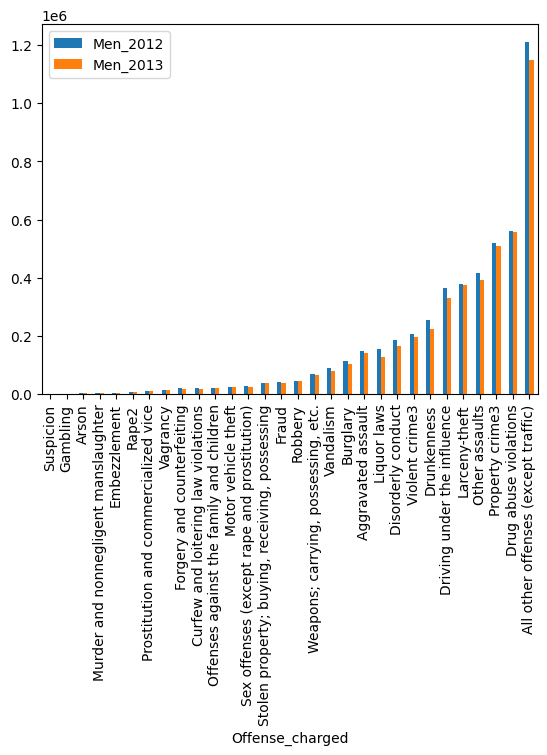

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
df_offence = df_crim.drop(0)
df_offence = df_offence.reset_index(drop=True)
df_offence = df_offence[['Offense_charged', 'Men_2012', 'Men_2013']]
df_offence = df_offence.sort_values(by='Men_2012')
df_offence.plot(x='Offense_charged', y=['Men_2012', 'Men_2013'], kind="bar")

### **1.5 Group bar plot for Female (Total) in the year 2012 and 2013.**
### **X-axis -> Different offense Charged (Column 1 below).**
### **Bar 1 -> 2012 Female Total**
### **Bar 2 -> 2013 Female Total**


<Axes: xlabel='Offense_charged'>

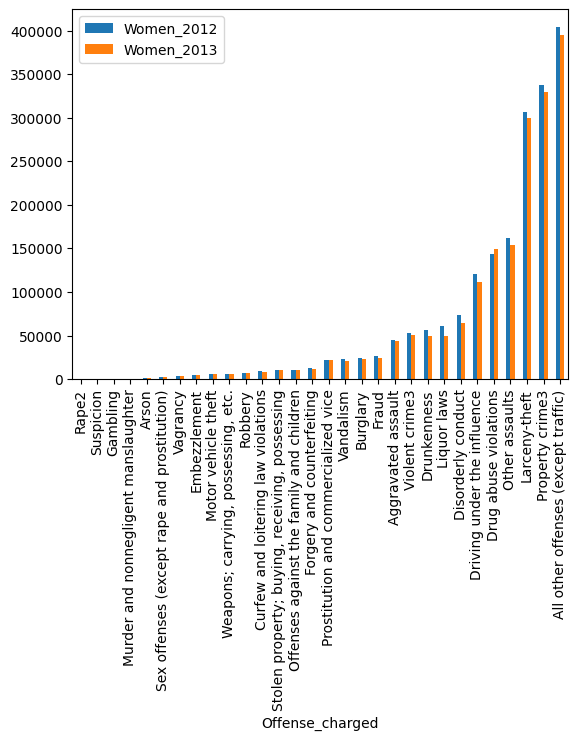

In [ ]:
import matplotlib.pyplot as plt
df_crim['Women_2012'] = pd.to_numeric(df_crim['Women_2012'])
df_crim['Women_2013'] = pd.to_numeric(df_crim['Women_2013'])
df_offence = df_crim.drop(0)
df_offence = df_offence.reset_index(drop=True)
df_offence = df_offence[['Offense_charged', 'Women_2012', 'Women_2013']]
df_offence = df_offence.sort_values(by='Women_2012')
df_offence.plot(x='Offense_charged', y=['Women_2012', 'Women_2013'], kind="bar")

## **PART II**

### **2.1 Filter out rows with only unit="%" but expected the columns with years such as "1994–95","1995–96", "2023–24 f","2024-25 f" should be converted to rows and add a new column named "Value" that should have the values from these columns  with years. One more thing "Community" should not be empty for the rows with unit="%" but they should take its values from its corresponding unit="\$m" rows.(hint: use pivot to convert columns to rows and use .fillna(method = "ffill") to fill the values for "Commodity" column for rows with unit="%" from its corresponding rows with unit="\$m")**


In [2]:
def prettyprint(df):
  print(tabulate(df, headers='keys', tablefmt='github'))

In [32]:
import pandas as pd
from tabulate import tabulate
sheets = [f"Table {i}" for i in range(1, 27)]
df_comm = pd.read_excel('/content/drive/MyDrive/data_analytics/MINIPROJECT_9/02_AgCommodities202403_Stats_v1.0.0.xlsx', sheet_name='Table 3', skiprows=6)
df_comm = df_comm.drop(df_comm.columns[0], axis=1)
df_comm = df_comm.drop(index=[0, 81])
df_comm['Commodity'] = df_comm['Commodity'].ffill()
df_comm = df_comm.pivot_table(index='Commodity', columns='unit', aggfunc='first').reset_index()
df_comm.columns = ['Commodity'] + ['_'.join(col) if isinstance(col, tuple) else col for col in df_comm.columns[1:]]
df_comm = df_comm.melt(id_vars='Commodity', var_name='Year_unit', value_name='Value')
df_comm[['Year', 'unit']] = df_comm['Year_unit'].str.split('_', expand=True)
df_comm = df_comm.pivot(index=['Commodity', 'Year'], columns='unit', values='Value').reset_index()
df_comm = df_comm.reset_index(drop=True)
df_comm = df_comm.drop(columns=["index"], errors="ignore")
df_comm.columns.name = None
df_comm.rename(columns={"$m": "Value ($m)", "%": "Percentage (%)"}, inplace=True)
prettyprint(df_comm)

|     | Commodity                        | Year      |   Value ($m) |   Percentage (%) |
|-----|----------------------------------|-----------|--------------|------------------|
|   0 | Crops                            | 1994–95   |    11508.8   |            0     |
|   1 | Crops                            | 1995–96   |    15723.8   |           36.624 |
|   2 | Crops                            | 1996–97   |    16539.8   |            5.19  |
|   3 | Crops                            | 1997–98   |    15982.2   |           -3.372 |
|   4 | Crops                            | 1998–99   |    16727.1   |            4.661 |
|   5 | Crops                            | 1999–00   |    17628.9   |            5.391 |
|   6 | Crops                            | 2000–01   |    19733.3   |           11.938 |
|   7 | Crops                            | 2001–02   |    22280     |           12.906 |
|   8 | Crops                            | 2002–03   |    16414.1   |          -26.328 |
|   9 | Crops        

### **2.2 Credit Card Fraud Detection: Credit Card Fraud classification using SVM Classifier & KNN Classifier Column value to be classified is in column "Is_fraud" and all other columns are the features. Use two-fold cross validation and evaluation metrics: Precision, Recall, F1-score, Accuracy [wiki]. Also print confusion matrix [wiki]. Refer basic notebook template for some code and also internet.**


In [ ]:
import pandas as pd
import numpy as np
from tabulate import tabulate
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, confusion_matrix
from sklearn import svm
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

In [ ]:
 chunk_size = 10000
data_chunks = pd.read_csv("/content/drive/MyDrive/data_analytics/MINIPROJECT_7/fraud test.csv", chunksize=chunk_size)

metrics = {"precision": [], "recall": [], "f1_score": [], "accuracy": [], "conf_matrix": []}
model = KNeighborsClassifier(n_neighbors=3)
kf = KFold(n_splits=2, shuffle=True, random_state=42)

for chunk in data_chunks:
    chunk = pd.get_dummies(chunk, dtype='int')
    X = chunk.drop(columns=["is_fraud"])
    y = chunk["is_fraud"]

    scale_target = False
    if scale_target:
        scaler_Y = StandardScaler()
        Y = scaler_Y.fit_transform(Y.values.reshape(-1, 1)).flatten()
    scaler_x = StandardScaler()
    X = pd.DataFrame(scaler_x.fit_transform(X), columns=X.columns)

    for train_index, test_index in kf.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        metrics["precision"].append(precision_score(y_test, y_pred))
        metrics["recall"].append(recall_score(y_test, y_pred))
        metrics["f1_score"].append(f1_score(y_test, y_pred))
        metrics["accuracy"].append(accuracy_score(y_test, y_pred))
        metrics["conf_matrix"].append(confusion_matrix(y_test, y_pred))


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.p

In [ ]:
print("Average Precision:", np.mean(metrics["precision"]))
print("Average Recall:", np.mean(metrics["recall"]))
print("Average F1-score:", np.mean(metrics["f1_score"]))
print("Average Accuracy:", np.mean(metrics["accuracy"]))


Average Precision: 0.6234530316744282
Average Recall: 0.4964613770804869
Average F1-score: 0.5242143091102022
Average Accuracy: 0.9971482142857143


In [ ]:
for i, cm in enumerate(metrics["conf_matrix"], 1):
    print(f"Confusion Matrix - Fold {i}:\n", cm)

Confusion Matrix - Fold 1:
 [[4990    1]
 [   9    0]]
Confusion Matrix - Fold 2:
 [[4985    2]
 [  10    3]]
Confusion Matrix - Fold 3:
 [[4962   10]
 [  11   17]]
Confusion Matrix - Fold 4:
 [[4975    7]
 [  10    8]]
Confusion Matrix - Fold 5:
 [[4965    7]
 [   7   21]]
Confusion Matrix - Fold 6:
 [[4964    2]
 [  13   21]]
Confusion Matrix - Fold 7:
 [[4977    1]
 [  12   10]]
Confusion Matrix - Fold 8:
 [[4976    8]
 [   4   12]]
Confusion Matrix - Fold 9:
 [[4978    7]
 [   4   11]]
Confusion Matrix - Fold 10:
 [[4982    2]
 [  11    5]]
Confusion Matrix - Fold 11:
 [[4973    3]
 [  11   13]]
Confusion Matrix - Fold 12:
 [[4964    8]
 [   5   23]]
Confusion Matrix - Fold 13:
 [[4974   11]
 [   3   12]]
Confusion Matrix - Fold 14:
 [[4986    2]
 [   7    5]]
Confusion Matrix - Fold 15:
 [[4978    9]
 [   4    9]]
Confusion Matrix - Fold 16:
 [[4980    8]
 [   6    6]]
Confusion Matrix - Fold 17:
 [[4957   12]
 [  13   18]]
Confusion Matrix - Fold 18:
 [[4951   15]
 [  18   16]]
C

In [ ]:
 chunk_size = 10000
data_chunks = pd.read_csv("/content/drive/MyDrive/data_analytics/MINIPROJECT_7/fraud test.csv", chunksize=chunk_size)

metrics = {"precision": [], "recall": [], "f1_score": [], "accuracy": [], "conf_matrix": []}
svm = SVC(C=0.2, kernel='linear', gamma='auto', class_weight='balanced', max_iter=1000)
kf = KFold(n_splits=2, shuffle=True, random_state=42)

for chunk in data_chunks:
    chunk = pd.get_dummies(chunk, dtype='int')
    X = chunk.drop(columns=["is_fraud"])
    y = np.array(chunk["is_fraud"].round().astype(int))

    scaler_x = StandardScaler()
    X = pd.DataFrame(scaler_x.fit_transform(X), columns=X.columns)

    for train_index, test_index in kf.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y[train_index], y[test_index]

        if np.unique(y_train).size < 2:
            print("Skipping chunk - only one class present in training data.")
            continue

        svm.fit(X_train, y_train)
        y_pred = svm.predict(X_test)

        metrics["precision"].append(precision_score(y_test, y_pred))
        metrics["recall"].append(recall_score(y_test, y_pred))
        metrics["f1_score"].append(f1_score(y_test, y_pred))
        metrics["accuracy"].append(accuracy_score(y_test, y_pred))
        metrics["conf_matrix"].append(confusion_matrix(y_test, y_pred))

/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:305: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:305: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:305: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/skl

Skipping chunk - only one class present in training data.
Skipping chunk - only one class present in training data.
Skipping chunk - only one class present in training data.
Skipping chunk - only one class present in training data.
Skipping chunk - only one class present in training data.
Skipping chunk - only one class present in training data.
Skipping chunk - only one class present in training data.
Skipping chunk - only one class present in training data.


In [ ]:
print("Average Precision:", np.mean(metrics["precision"]))
print("Average Recall:", np.mean(metrics["recall"]))
print("Average F1-score:", np.mean(metrics["f1_score"]))
print("Average Accuracy:", np.mean(metrics["accuracy"]))

Average Precision: 0.6809024358176686
Average Recall: 0.2758094478892684
Average F1-score: 0.36319004193743487
Average Accuracy: 0.9966365384615384


In [ ]:
for i, cm in enumerate(metrics["conf_matrix"], 1):
    print(f"Confusion Matrix - Fold {i}:\n", cm)

Confusion Matrix - Fold 1:
 [[4990    1]
 [   9    0]]
Confusion Matrix - Fold 2:
 [[4987    0]
 [  13    0]]
Confusion Matrix - Fold 3:
 [[4972    0]
 [  20    8]]
Confusion Matrix - Fold 4:
 [[4982    0]
 [  14    4]]
Confusion Matrix - Fold 5:
 [[4969    3]
 [  10   18]]
Confusion Matrix - Fold 6:
 [[4965    1]
 [  16   18]]
Confusion Matrix - Fold 7:
 [[4978    0]
 [  22    0]]
Confusion Matrix - Fold 8:
 [[4984    0]
 [  14    2]]
Confusion Matrix - Fold 9:
 [[4981    4]
 [   6    9]]
Confusion Matrix - Fold 10:
 [[4982    2]
 [  11    5]]
Confusion Matrix - Fold 11:
 [[4976    0]
 [  14   10]]
Confusion Matrix - Fold 12:
 [[4972    0]
 [  15   13]]
Confusion Matrix - Fold 13:
 [[4981    4]
 [  12    3]]
Confusion Matrix - Fold 14:
 [[4986    2]
 [  12    0]]
Confusion Matrix - Fold 15:
 [[4984    3]
 [  13    0]]
Confusion Matrix - Fold 16:
 [[4987    1]
 [   9    3]]
Confusion Matrix - Fold 17:
 [[4966    3]
 [  18   13]]
Confusion Matrix - Fold 18:
 [[4965    1]
 [  29    5]]
C